##PRML Chapter 1.1. Polynominal curve fitting

2015/04/11 ysmrnbt

PRMLを読み始めた。
読んでいると分かったつもりにはなるけれど、いざ人に説明しようとしてもできなかったり。
式を追っていると混乱してきたり。
というわけで、
http://aidiary.hatenablog.com/entry/20100829/1283068351
を参考に色々値変えて動かしながら考えてみることにした。
使うのはipythonで。

今回やるのは最小二乗法。PRML内では多項式曲線フィッティング。

最小二乗法の手順は至ってシンプル。

1. モデルとして使う多項式の次数を決めて
2. 評価関数(実値との差分をみる関数)が最小になるように係数求める。

まずはお決まりのグラフ化の一文

In [16]:
%matplotlib inline

importは2個だけ

In [17]:
#coding:utf-8
import numpy as np
from pylab import *

まずは実際の値を作る。sin波にランダムノイズを足したような点をN個(ここでは10個)作る。

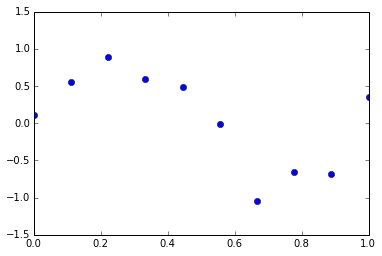

In [18]:
# generate traing data of N points
xlist = np.linspace(0, 1, 10)     # abstract 10 points equally from 0 to 1
tlist = np.sin(2 * np.pi * xlist) + np.random.normal(0, 0.2, xlist.size)  # add random numbers to sinusoidal wave

#plot
xlim(0.0, 1.0)                  # range of x axis
ylim(-1.5, 1.5)                 # range of y axis
plot(xlist, tlist, 'bo')        # plot training data by blue(b) point(o)

なんかsin波が崩れた感じの点ができた。

ちなみに使ったランダムノイズの中身はこんな感じ。

In [84]:
#contents of random numbers
print np.random.normal(0, 0.2, xlist.size) 

[-0.28558705 -0.22169302  0.07981765 -0.31414016 -0.11794682 -0.26199927
 -0.08654735  0.29413899 -0.01163228 -0.06627262]


この10個のノイズを各点に足してる。

お次は理想的なsin波を重ね書き。

In [19]:
# original sinusoidal wave
xs = np.linspace(0, 1, 1000)    # data points
ideal = np.sin(2 * np.pi * xs)  # ideal sinusoidal wave

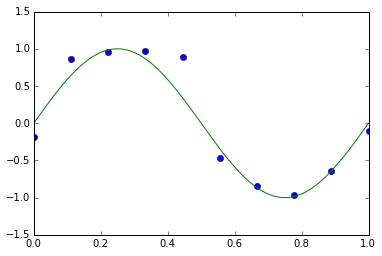

In [5]:
#plot
xlim(0.0, 1.0)                  # range of x axis
ylim(-1.5, 1.5)                 # range of y axis
plot(xlist, tlist, 'bo')        # plot training data by blue(b) point(o)
plot(xs, ideal, 'g-')           #plot original data by green(g) line(-)

ここから最小二乗法の始まり。まずは

# 1. モデルとして使う多項式の次数を決めて

の部分。次数を決めて、多項式をretとして定義。ここでは次数は10とかなり大きめ。

In [20]:
# M order polynominal
M = 3
def y(x, wlist):
    ret = wlist[0]
    for i in range(1, M+1):
        ret += wlist[i] * (x ** i)
    return ret

wlistというのが係数で、次に求めるやつ。

# 2. 評価関数(実値との差分をみる関数)が最小になるように係数求める。

In [21]:
# estimate paremeters from training data
def estimate(xlist, tlist, lam):
    # M+1 parameters exist when the order of polynominal is M
    A = []
    for i in range(M+1):
        for j in range(M+1):
            temp = (xlist**(i+j)).sum()
            if i == j: temp += lam  # add lamda for regularization
            A.append(temp)
    A = array(A).reshape(M+1, M+1)

    T = []
    for i in range(M+1):
        T.append(((xlist**i) * tlist).sum())
    T = array(T)
    
    # calculate w
    wlist = np.linalg.solve(A, T)
    
    return wlist

詳しい解説はこちらで。http://aidiary.hatenablog.com/entry/20100327/1269657354

上記事でもある通り、次数が10もあるとオーバーフィッティング(過学習)が起こる。全ての点にフィッティングしようとしてモデルがぐにゃぐにゃになってしまうという現象。これを調節するために正則化を行ってるのが上記プログラム内のlamってやつ。

lamが0、つまり正則化してない時の係数(wlist)が以下。

In [23]:
# estimate parameters from training data
wlist = estimate(xlist, tlist, 0)
print wlist

[ -1.62567414e-03   9.56751741e+00  -2.89296976e+01   1.96461574e+01]


10の5乗とか6乗とかとにかく大きい。このモデルでは点に合わせすぎて係数が大きいぐにゃぐにゃモデルになってしまっている。

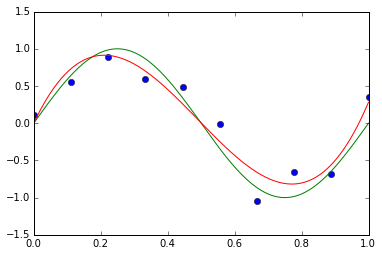

In [24]:
model = [y(x, wlist) for x in xs]  # estimated model
xlim(0.0, 1.0)
ylim(-1.5, 1.5)
plot(xlist, tlist, 'bo')  # training data
plot(xs, ideal, 'g-')     # ideal plot
plot(xs, model, 'r-')     # estimated model

こんな感じ。

ここでlamとしてexponentialの-18乗を加えるだけで係数が以下の通り。

In [100]:
# estimate parameters from training data
wlist = estimate(xlist, tlist, np.exp(-18))
print wlist

[  4.96873402e-02   5.56770427e+00   2.77517900e+01  -1.95416505e+02
   2.66014584e+02   4.39203850e+01  -1.94124851e+02  -1.32583076e+02
   1.16992433e+02   2.29237219e+02  -1.67453799e+02]


In [101]:
model = [y(x, wlist) for x in xs]  # estimated model

グラフはこんな感じ。

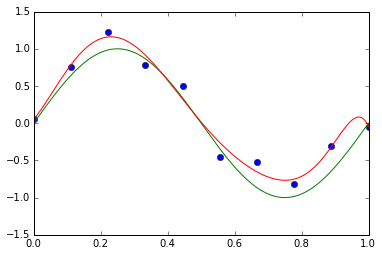

In [102]:
xlim(0.0, 1.0)
ylim(-1.5, 1.5)
plot(xlist, tlist, 'bo')  # training data
plot(xs, ideal, 'g-')     # ideal plot
plot(xs, model, 'r-')     # estimated model

以上。最小二乗法終わり。ちなみにpythonにはOLS(ordinary least square)とか最小二乗法の関数は既に入っているので、それも今度試してみる予定。

# 1.2.5. 最尤推定

2015/04/18  ysmrnbt

モデルの作り方は基本的に最小二乗法と同じ。

対数尤度の最大化＝誤差関数の最小化

ここではモデル化に加え、精度パラメータ(分散の逆数)を導出し分布を求める。

(-1.5, 1.5)

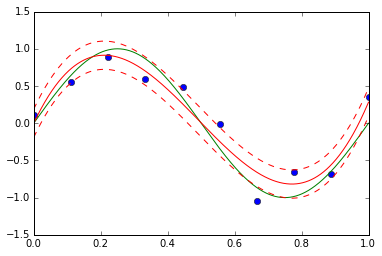

In [25]:
#estimate the precision parameter
N = len(xlist)
sums = 0
w_ml = estimate(xlist, tlist,0)
for n in range(N):
    sums += (y(xlist[n], w_ml) - tlist[n]) ** 2
    beta_inv = 1.0 / N * sums

means = []
uppers = []
lowers = []

for x in xs:
    m = y(x, w_ml)      # mean of estimated distribution
    s = sqrt(beta_inv)  # standard deviation of estimated distribution
    u = m + s           # mean + standard deviation
    l = m - s           # mean - standard deviation
    means.append(m)
    uppers.append(u)
    lowers.append(l)
    
plot(xlist, tlist, 'bo')  # training data
plot(xs, ideal, 'g-')     # ideal plot
plot(xs, means, 'r-')     # mean of estimated model
plot(xs, uppers, 'r--')
plot(xs, lowers, 'r--')
xlim(0.0, 1.0)
ylim(-1.5, 1.5)

標準偏差を求める事で図のように分布を求める事ができる。ちなみにモデルの次数は3。

In [26]:
beta = 1.0 / beta_inv
print beta

27.7657287978
